# Task 6.5: Unsupervised Machine Learning - Clustering

## This script contains:
#### 1. Importing libraries and data
#### 2. Dropping columns and stadardizing dataset
#### 3. The elbow technique
#### 4. k-means clustering

# 1. Importing Libraries & Data

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
%matplotlib inline

### Data

In [3]:
# Create path
path = r'C:\Users\M de Villiers\Desktop\Data Analytics\Achievement 6\02_Data\Prepared_Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'FINAL_COVID_19_DATA1.csv'), index_col = False)

In [5]:
df.head()

,country,iso_code,month_year,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,monthly_vaccinations_per_million,continent,population,new_cases,total_cases,new_deaths,total_deaths,%deaths,%cases
0,Afghanistan,AFG,2021-02,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",8200,8200,0,0,8202,0.02,...,0.00,204,Asia,39835428,691,55714,43,2443,0.006133,0.139860
1,Afghanistan,AFG,2021-03,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",54000,54000,0,0,85894,0.14,...,0.00,2154,Asia,39835428,740,56454,41,2484,0.006236,0.141718
2,Afghanistan,AFG,2021-04,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",240000,240000,0,0,219606,0.60,...,0.00,5511,Asia,39835428,3291,59745,141,2625,0.006590,0.149980
3,Afghanistan,AFG,2021-05,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",600152,480226,119926,2859,285838,1.51,...,0.30,7171,Asia,39835428,12093,71838,319,2944,0.007390,0.180337
4,Afghanistan,AFG,2021-06,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",886854,699200,187654,4015,242899,2.23,...,0.47,6097,Asia,39835428,46821,118659,1927,4871,0.012228,0.297873


In [6]:
df.tail()

,country,iso_code,month_year,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,monthly_vaccinations_per_million,continent,population,new_cases,total_cases,new_deaths,total_deaths,%deaths,%cases
5463,Zimbabwe,ZWE,2020-09,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,1341,7838,26,228,0.001511,0.051934
5464,Zimbabwe,ZWE,2020-10,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,529,8367,15,243,0.001610,0.055439
5465,Zimbabwe,ZWE,2020-11,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,1583,9950,33,276,0.001829,0.065928
5466,Zimbabwe,ZWE,2020-12,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,3917,13867,87,363,0.002405,0.091882
5467,Zimbabwe,ZWE,2021-01,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,19521,33388,854,1217,0.008064,0.221227


In [7]:
df.shape

(5468, 21)

# 2. Dropping Columns & Standarizing Dataset

In [8]:
df = df.drop(columns = ['country'])

In [9]:
df = df.drop(columns = ['iso_code', 'month_year'])

In [10]:
df = df.drop(columns = ['people_fully_vaccinated', 'monthly_vaccinations_per_million', 'continent'])

In [11]:
df = df.drop(columns = ['vaccines', 'people_vaccinated', 'total_cases', 'total_deaths'])

In [12]:
df.head()

,total_vaccinations,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,new_cases,new_deaths,%deaths,%cases
0,8200,0,8202,0.02,0.02,0.00,39835428,691,43,0.006133,0.139860
1,54000,0,85894,0.14,0.14,0.00,39835428,740,41,0.006236,0.141718
2,240000,0,219606,0.60,0.60,0.00,39835428,3291,141,0.006590,0.149980
3,600152,2859,285838,1.51,1.21,0.30,39835428,12093,319,0.007390,0.180337
4,886854,4015,242899,2.23,1.76,0.47,39835428,46821,1927,0.012228,0.297873


In [13]:
df.dtypes

total_vaccinations                       int64
monthly_vaccinations_raw                 int64
monthly_vaccinations                     int64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
population                               int64
new_cases                                int64
new_deaths                               int64
%deaths                                float64
%cases                                 float64
dtype: object

In [14]:
df = df.drop(columns = ['monthly_vaccinations_raw', 'monthly_vaccinations'])

In [15]:
df.head()

,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,new_cases,new_deaths,%deaths,%cases
0,8200,0.02,0.02,0.00,39835428,691,43,0.006133,0.139860
1,54000,0.14,0.14,0.00,39835428,740,41,0.006236,0.141718
2,240000,0.60,0.60,0.00,39835428,3291,141,0.006590,0.149980
3,600152,1.51,1.21,0.30,39835428,12093,319,0.007390,0.180337
4,886854,2.23,1.76,0.47,39835428,46821,1927,0.012228,0.297873


In [16]:
# Stadardizing the dataset
scaler = StandardScaler()

In [17]:
df_std = scaler.fit_transform(df)

# 3. The Elbow Technique

In [18]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))] 

score

[-49211.999999999985,
 -32184.304041484767,
 -25002.294271112303,
 -20931.110689192104,
 -18023.54630467843,
 -15424.003645833925,
 -13513.254039510275,
 -12122.16441673724,
 -11148.80899402484]

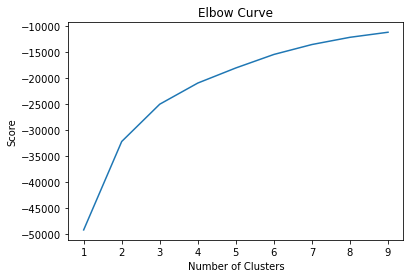

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for my clusters is 3, since this is the point were the datasort of flattens out (although not completely but it is much more smooth).

# 4. K-Means Clustering

In [21]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [22]:
# Fit the k-means object to the data.
kmeans.fit(df_std)

C:\Users\M de Villiers\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [23]:
df['clusters'] = kmeans.fit_predict(df_std)

C:\Users\M de Villiers\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [24]:
df.head(10)

,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,new_cases,new_deaths,%deaths,%cases,clusters
0,8200,0.02,0.02,0.00,39835428,691,43,0.006133,0.139860,0
1,54000,0.14,0.14,0.00,39835428,740,41,0.006236,0.141718,0
2,240000,0.60,0.60,0.00,39835428,3291,141,0.006590,0.149980,0
3,600152,1.51,1.21,0.30,39835428,12093,319,0.007390,0.180337,0
4,886854,2.23,1.76,0.47,39835428,46821,1927,0.012228,0.297873,0
5,1171064,2.94,1.87,0.55,39835428,28495,1837,0.016839,0.369405,0
6,1979652,4.97,1.94,1.08,39835428,6066,410,0.017869,0.384632,0
7,2369625,5.95,2.08,1.08,39835428,1954,86,0.018084,0.389538,0
8,2369625,5.95,2.08,1.08,39835428,1076,76,0.018275,0.392239,0
9,4018197,10.09,8.86,8.00,39835428,1039,28,0.018345,0.394847,0


In [25]:
df.tail(10)

,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,new_cases,new_deaths,%deaths,%cases,clusters
5458,0,0.0,0.0,0.0,15092171,32,3,0.000027,0.000265,0
5459,0,0.0,0.0,0.0,15092171,144,0,0.000027,0.001179,0
5460,0,0.0,0.0,0.0,15092171,413,3,0.000046,0.003916,0
5461,0,0.0,0.0,0.0,15092171,2578,60,0.000444,0.020998,0
5462,0,0.0,0.0,0.0,15092171,3328,135,0.001338,0.043049,0
5463,0,0.0,0.0,0.0,15092171,1341,26,0.001511,0.051934,0
5464,0,0.0,0.0,0.0,15092171,529,15,0.001610,0.055439,0
5465,0,0.0,0.0,0.0,15092171,1583,33,0.001829,0.065928,0
5466,0,0.0,0.0,0.0,15092171,3917,87,0.002405,0.091882,0
5467,0,0.0,0.0,0.0,15092171,19521,854,0.008064,0.221227,0


In [26]:
df['clusters'].value_counts()

0    4130
1    1257
2      81
Name: clusters, dtype: int64

In [28]:
df.to_csv(os.path.join(path, 'Cluster_Covid.csv'), index=False)

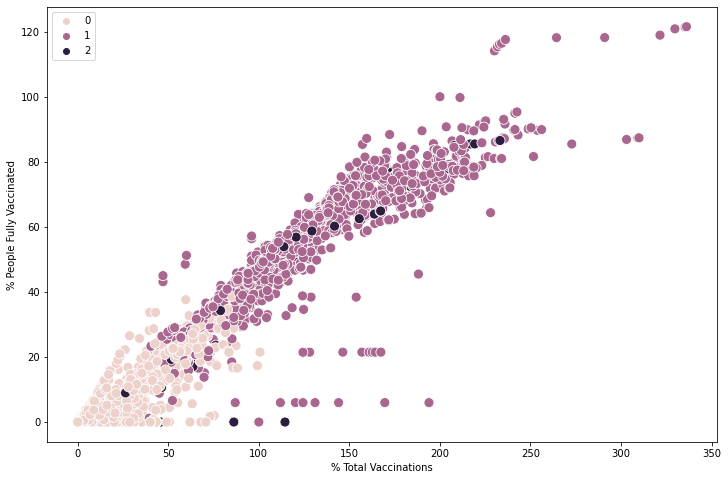

In [27]:
# Plot the clusters for the "total_vaccinations" vs "people fully vaccinated"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['people_fully_vaccinated_per_hundred'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('% Total Vaccinations')
plt.ylabel('% People Fully Vaccinated')
plt.show()

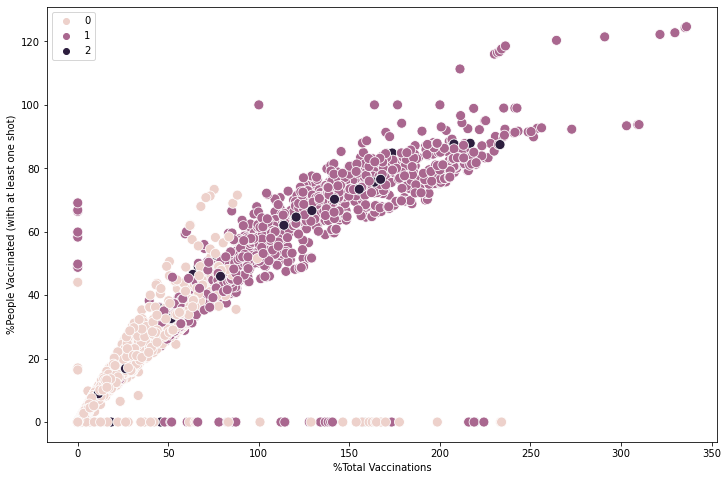

In [57]:
# Plot the clusters for the "total_vaccinations" vs "people vaccinated (with at least one shot)"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['people_vaccinated_per_hundred'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('%Total Vaccinations')
plt.ylabel('%People Vaccinated (with at least one shot)')
plt.show()

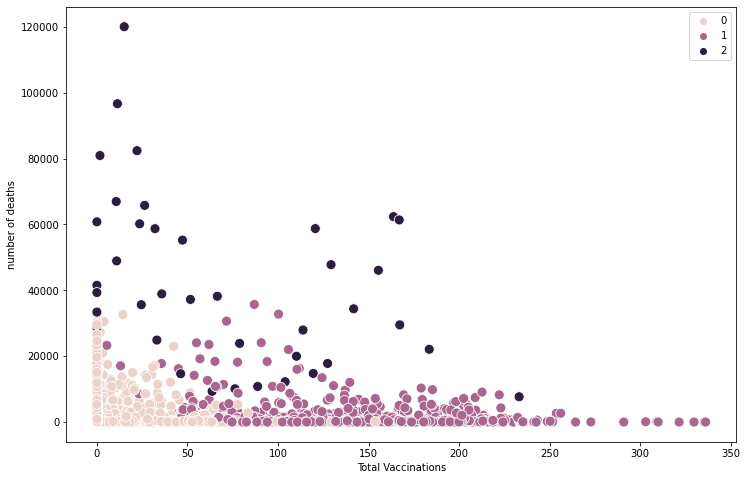

In [58]:
# Plot the clusters for the "total_vaccinations" vs "deaths"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['new_deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Vaccinations')
plt.ylabel('number of deaths')
plt.show()

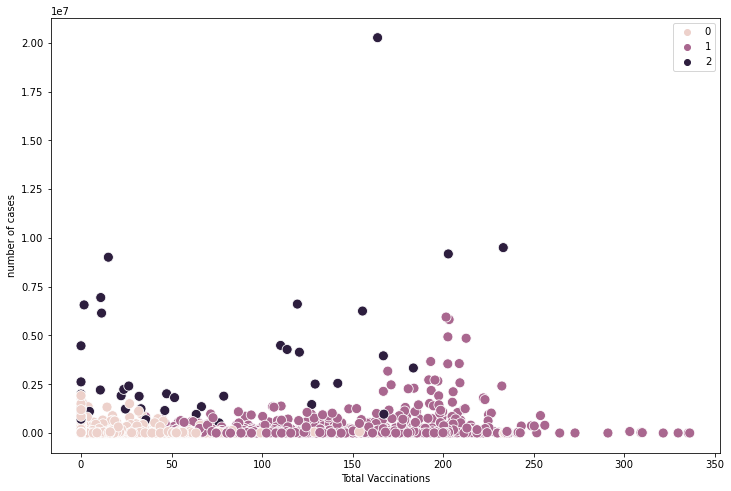

In [59]:
# Plot the clusters for the "total_vaccinations" vs "cases"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['new_cases'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Vaccinations')
plt.ylabel('number of cases')
plt.show()

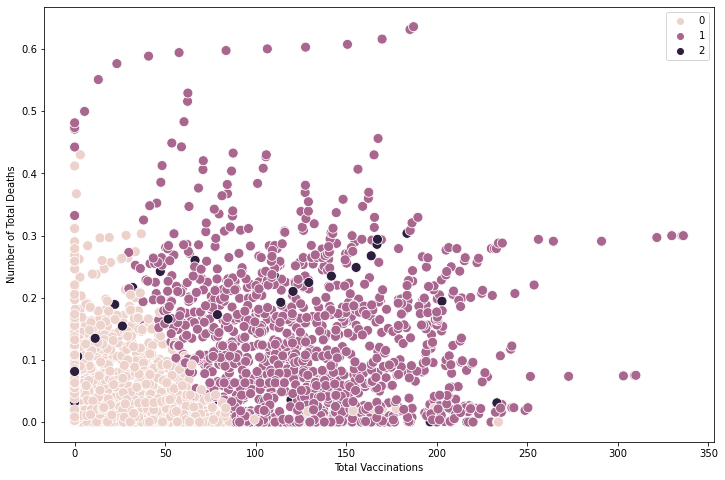

In [60]:
# Plot the clusters for the "total_vaccinations" vs "total deaths"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['%deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Vaccinations')
plt.ylabel('Number of Total Deaths')
plt.show()

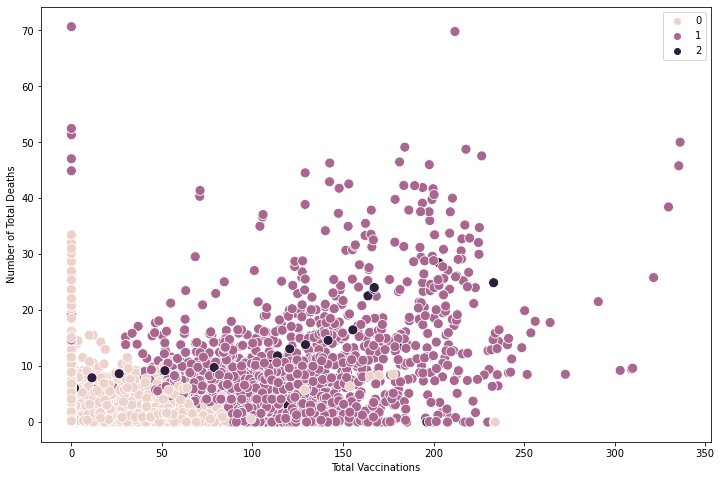

In [61]:
# Plot the clusters for the "total_vaccinations" vs "total cases"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['%cases'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Vaccinations')
plt.ylabel('Number of Total Deaths')
plt.show()

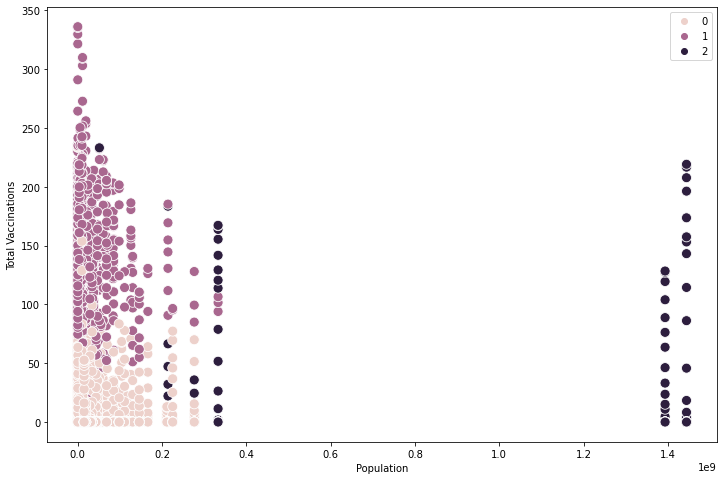

In [62]:
# Plot the clusters for the "total_vaccinations" vs "population"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df['total_vaccinations_per_hundred'], x=df['population'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.ylabel('Total Vaccinations')
plt.xlabel('Population')
plt.show()

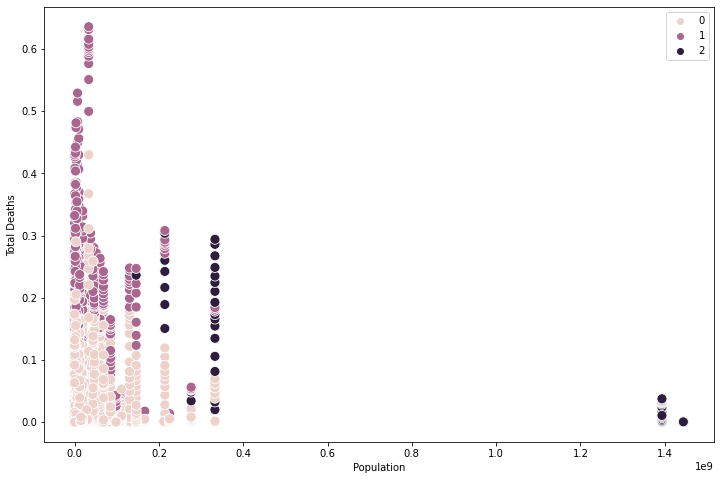

In [63]:
# Plot the clusters for the "total_deaths" vs "population"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df['%deaths'], x=df['population'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.ylabel('Total Deaths')
plt.xlabel('Population')
plt.show()

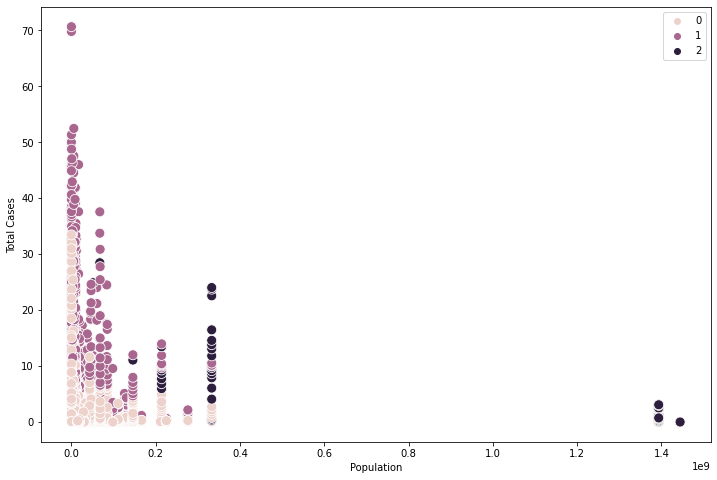

In [64]:
# Plot the clusters for the "total_cases" vs "population"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df['%cases'], x=df['population'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.ylabel('Total Cases')
plt.xlabel('Population')
plt.show()

# Question 8
It seems as though the data is grouped by cases, deaths and vaccinations (not population size).

#### Pink (0)
This group seems to be up MOSTLY by coutries with small populations who have not been hit too hard by COVID and that has either finished the vaccination process, or did not feel a need to move quickly with the vaccination process. There are a few exceptions though. Big populations with very few total vaccinations but also very few cases and deaths. They are "low/low range countries" (low cases & deaths and low vaccinations). To really determine how they have faired in the vaccination process, I could add the "vaccinations by hundred" column and redo the the clustering, since would show more a percentage of the population that has been vaccinated (or I can look at the stats towards the end of this exercise).

#### Purple (1)
This group seems to have all the bad luck and bad planning. They have cases and deaths ranging mostly from middle to high numbers, although some have low number of deaths (only a few exceptions). These are either countries with small populations or big populations, but no matter population size, they have a low amount of total vaccinations, since even those with large populations have a low number of total vaccinations. I am gussing they could be some of the African countries who we have seen in the previous exercise is not doing very well with the vaccination process. In general they have a high death rate with a low vaccination rate. I guess they are the countries who have been hit worst by COVID-19 but who hasn't done very well in shielding themselves from it. There are many factors that could influence this: socio-economic factors, cultural factors, resources, funding, etc. They are the "high/low range countries" (middle to high number of cases and deaths but low number of  vaccinations).

#### Dark Purple (2)
This group seems to be the most successful with the vaccination process. They are low to middle range when looking at cases and deaths but they are definitely in the high range when looking at total vaccinations, as well as people fully vaccinated or had at least one shot. It would seem that in the beginning just as vaccination rollouts started they had a high number of monthly deaths, but since their vaccination rollouts progressed quite quickly deaths have decreased or at least plateaued. These are all countries with large populations. I guess they would be large developed countries with high education and plenty of resources, such as some Western European countries, and the USA and Canada. I would call them "mid/high range countries" (low to middle cases & deaths but high number of vaccinations).

I think for me these groups make sense, if comparing them by cases/deaths and vaccinations.

In [65]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [66]:
df.groupby('cluster').agg({'total_vaccinations_per_hundred':['mean', 'median'], 
                         'people_vaccinated_per_hundred':['mean', 'median'],
                         'people_fully_vaccinated_per_hundred':['mean', 'median'],
                         'new_cases':['mean', 'median'], 
                         '%cases':['mean', 'median'], 
                          'new_deaths':['mean', 'median'], '%deaths':['mean', 'median'], 'population':['mean', 'median']})

total_vaccinations_per_hundred          \
                                      mean  median   
cluster                                              
dark purple                      60.329383   23.62   
pink                              7.499294    0.00   
purple                          127.846386  125.22   

            people_vaccinated_per_hundred         \
                                     mean median   
cluster                                            
dark purple                     27.355185   8.93   
pink                             4.548403   0.00   
purple                          61.948847  64.74   

            people_fully_vaccinated_per_hundred            new_cases  \
                                           mean median          mean   
cluster                                                                
dark purple                           21.676543   2.20  1.861235e+06   
pink                                   2.337169   0.00  3.110679e+04   
purple                                54.360180  56.59  1.663534e+05   

                          %cases              new_deaths            %deaths  \
               median       mean    median          mean   median      mean   
cluster                                                                       
dark purple  711710.0   4.204093  0.738240  21797.716049  10810.0  0.064085   
pink           1280.0   1.297948  0.225240    713.708453     17.0  0.022113   
purple        15244.0  10.639257  8.599883   1113.488962    112.0  0.131403   

                         population                
               median          mean        median  
cluster                                            
dark purple  0.011279  1.037578e+09  1.393409e+09  
pink         0.003287  2.379409e+07  7.089090e+06  
purple       0.108396  1.891783e+07  5.126300e+06

# Question 10
These result help shed some light on how I might have to go forward in my analysis. In this exercise I worked with "raw data" not exactly raw but I think since working with countries with different population sizes it would probaly make more sense converting my data into proportions of the population - this way the countries would be more relatable since I will be working with percentages instead of raw numbers. It would seem unfair to deem a country "unsuccessful" in their vaccination process purely on "total vaccinations", since countries with small populations will never have as many vaccinations as countries with extremely large populations. This method helped me see how countries are clustered together and it helps that countries were not only classified according to vaccinations, but also by number of deaths and cases which makes a bit more sense. If countries did not have a high number of cases, then vaccination were either not necessary or they are probably already fully vaccinated (small country). This gave me the necessary insight to know that from now on I will analyse my results based on percentages instead of raw numbers. What percentage of each country has already been vaccinated - this is a much fairer question than "how many people in total have been vaccinated".